In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 머신러닝을 지원하는 sklearn 라이브러리 가져오기
from sklearn.neighbors import KNeighborsClassifier
# 평가 지표들을 활용할 수 있는 metrics 모듈을 불러오기
from sklearn import metrics
import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split#학습 평가 데이터 분리
import seaborn as sns #matplot과 유사하게 시각화 라이브러리이지만 좀 더 깔끔함
from sklearn.datasets import load_iris #붓꽃
from sklearn.tree import DecisionTreeClassifier #트리
# !pip install seaborn
# 손쉽게 레이블 인코딩을 하기 위해 레이블인코더를 임포트
from sklearn.preprocessing import LabelEncoder
#!pip install graphviz #시각화 외부라이브러리
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler #StandardScaler
from sklearn.preprocessing import MinMaxScaler  #MinMaxScaler
from sklearn.datasets import load_breast_cancer
#!pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install 목차보기
from sklearn.model_selection import cross_val_score#교차검증 적용을 위해 임포트
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier #앙상블 모델

In [83]:
train = pd.read_csv("data/train1.csv", index_col="ID") 
test = pd.read_csv("data/test1.csv", index_col="ID")

In [84]:
train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,C,Ship,2.0,2,135,3.0,low,M,NaN,1339,1
2,F,Flight,5.0,3,225,5.0,low,F,6.0,1082,0
3,F,Ship,3.0,1,229,3.0,low,M,NaN,4971,1
4,F,Ship,3.0,2,228,NaN,medium,M,2.0,5640,0
5,D,Flight,NaN,1,195,6.0,high,F,NaN,4944,1
...,...,...,...,...,...,...,...,...,...,...,...
6995,D,Ship,4.0,2,232,5.0,medium,F,4.0,1783,0
6996,F,Ship,3.0,5,228,2.0,medium,F,NaN,5208,0
6997,D,Ship,NaN,1,300,5.0,low,F,10.0,1787,0


In [85]:
test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
ID,,,,,,,,,,
7000,F,Ship,3.0,1,274,NaN,high,M,NaN,4352
7001,F,Ship,3.0,4,136,2.0,medium,F,NaN,1056
7002,A,Flight,NaN,5,140,3.0,low,F,7.0,5383
7003,C,Ship,NaN,1,291,4.0,low,F,NaN,1880
7004,F,?,4.0,2,147,3.0,low,F,5.0,5174
...,...,...,...,...,...,...,...,...,...,...
10995,A,?,4.0,1,204,4.0,?,F,NaN,1667
10996,C,Ship,NaN,3,195,2.0,medium,M,NaN,3869
10997,B,Flight,NaN,3,206,2.0,medium,M,7.0,4531


In [86]:
train.keys()

Index(['Warehouse_block ', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [87]:
test.keys()

Index(['Warehouse_block ', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')

In [88]:
print(train.shape)
print(test.shape)

(6999, 11)
(4000, 10)


In [89]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  5423 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6049 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     3468 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 656.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------       

In [90]:
train["Mode_of_Shipment"]

ID
1          Ship
2        Flight
3          Ship
4          Ship
5        Flight
         ...   
6995       Ship
6996       Ship
6997       Ship
6998       Road
6999       Ship
Name: Mode_of_Shipment, Length: 6999, dtype: object

- train 결측치
-  Customer_care_calls, Prior_purchases, Discount_offered

- test 결측치
- Customer_care_calls,Prior_purchases,  Discount_offered

In [91]:
train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,C,Ship,2.0,2,135,3.0,low,M,NaN,1339,1
2,F,Flight,5.0,3,225,5.0,low,F,6.0,1082,0
3,F,Ship,3.0,1,229,3.0,low,M,NaN,4971,1
4,F,Ship,3.0,2,228,NaN,medium,M,2.0,5640,0
5,D,Flight,NaN,1,195,6.0,high,F,NaN,4944,1
...,...,...,...,...,...,...,...,...,...,...,...
6995,D,Ship,4.0,2,232,5.0,medium,F,4.0,1783,0
6996,F,Ship,3.0,5,228,2.0,medium,F,NaN,5208,0
6997,D,Ship,NaN,1,300,5.0,low,F,10.0,1787,0


In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  5423 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6049 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     3468 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 656.2+ KB


In [93]:
train["Discount_offered"].mean()

13.269031141868512

In [94]:
test["Prior_purchases"] = test["Prior_purchases"].fillna(0)

In [95]:
train["Prior_purchases"] = train["Prior_purchases"].fillna(0)

In [96]:
test["Discount_offered"] = test["Discount_offered"].fillna(13)

In [97]:
train["Discount_offered"] = train["Discount_offered"].fillna(13)

In [98]:
test["Customer_care_calls"] = test["Customer_care_calls"].fillna(3)

In [99]:
train["Customer_care_calls"] = train["Customer_care_calls"].fillna(3)

In [100]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     6999 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 656.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------       

In [101]:
test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
ID,,,,,,,,,,
7000,F,Ship,3.0,1,274,0.0,high,M,13.0,4352
7001,F,Ship,3.0,4,136,2.0,medium,F,13.0,1056
7002,A,Flight,3.0,5,140,3.0,low,F,7.0,5383
7003,C,Ship,3.0,1,291,4.0,low,F,13.0,1880
7004,F,?,4.0,2,147,3.0,low,F,5.0,5174
...,...,...,...,...,...,...,...,...,...,...
10995,A,?,4.0,1,204,4.0,?,F,13.0,1667
10996,C,Ship,3.0,3,195,2.0,medium,M,13.0,3869
10997,B,Flight,3.0,3,206,2.0,medium,M,7.0,4531


### 데이터 전처리

In [102]:
train.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.015652,0.046637,0.092780,-0.095014,-0.070801
Customer_rating,0.015652,1.000000,-0.001961,-0.002233,-0.007780,0.011275
Cost_of_the_Product,0.046637,-0.001961,1.000000,0.028297,-0.023089,-0.012811
Prior_purchases,0.092780,-0.002233,0.028297,1.000000,-0.039500,-0.032579
Discount_offered,-0.095014,-0.007780,-0.023089,-0.039500,1.000000,0.279644
Reached.on.Time_Y.N,-0.070801,0.011275,-0.012811,-0.032579,0.279644,1.000000


- Customer_care_calls 채우기

In [103]:
pt1 = train.pivot_table(values="Customer_care_calls", # 데이터로 사용될 열(컬럼)을 지정
                        index = ["Prior_purchases", "Mode_of_Shipment"],#멀티인덱스 설정 
                        aggfunc="count", # 데이터 요약시 사용하는 함수를 지정,mean, sum, count
                       )
pt1

Customer_care_calls
Prior_purchases Mode_of_Shipment                     
0.0              Flight                           124
                 Road                             156
                 Ship                             624
                ?                                  46
2.0              Flight                           205
                 Road                             210
                 Ship                             925
                ?                                  83
3.0              Flight                           317
                 Road                             341
                 Roadzk                             1
                 Ship                            1401
                 Shipzk                             1
                ?                                 115
4.0              Flight                           176
                 Flightzk                           1
                 Road                             156
                 Ship                             785
                ?                                  44
5.0              Flight                           138
                 Road                             106
                 Ship                             441
                 Shipzk                             1
                ?                                  49
6.0              Flight                            48
                 Road                              62
                 Ship                             182
                ?                                  18
7.0              Flight                            10
                 Road                              13
                 Ship                              40
                ?                                   7
8.0              Flight                             9
                 Road                              12
                 Ship                              47
                ?                                   4
10.0             Flight                            12
                 Road                              19
                 Ship                              63
                ?                                   7

In [104]:
train["Customer_care_calls"] = train["Customer_care_calls"].fillna("3")

In [105]:
train["Customer_care_calls"]

ID
1       2.0
2       5.0
3       3.0
4       3.0
5       3.0
       ... 
6995    4.0
6996    3.0
6997    3.0
6998    3.0
6999    3.0
Name: Customer_care_calls, Length: 6999, dtype: float64

- def함수를 이용해 결측치를 채워보자

In [106]:
def fill_calls(data) :  # 매개변수 data에는 train 혹은 test가 들어가게 됨
    
    if pd.isna(data["Customer_care_calls"]) :
        # 위 피벗테이블에서 만든 값을 리턴
        return pt1.loc[data["pr"], data["Mode_of_Shipment"]]
    else :
        return data["Customer_care_calls"]

In [107]:
train["Customer_care_calls"]

ID
1       2.0
2       5.0
3       3.0
4       3.0
5       3.0
       ... 
6995    4.0
6996    3.0
6997    3.0
6998    3.0
6999    3.0
Name: Customer_care_calls, Length: 6999, dtype: float64

In [108]:
# apply 사용해서 함수 적용
train["Customer_care_calls"] = train.apply(fill_calls, axis=1).astype("int64")


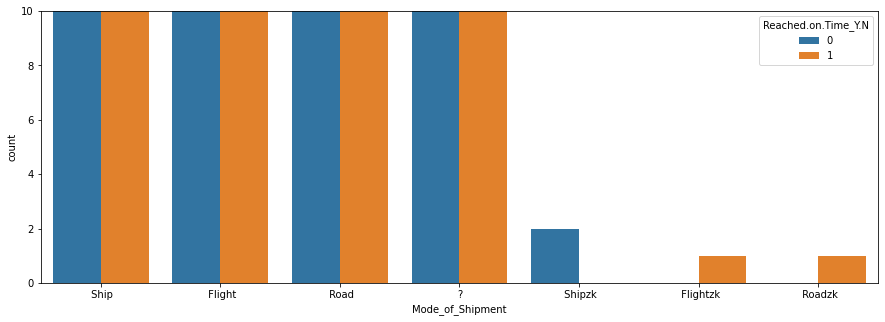

In [109]:
plt.figure(figsize=(15, 5))
plt.ylim(0, 10) # y축의 범위를 0  ~ 10까지로 설정
sns.countplot(data = train,
              x = "Mode_of_Shipment",
              hue = "Reached.on.Time_Y.N"
             );

In [110]:
train["Mode_of_Shipment"].unique()

array([' Ship', ' Flight', ' Road', '?', ' Shipzk', ' Flightzk',
       ' Roadzk'], dtype=object)

In [111]:
test["Mode_of_Shipment"].unique()

array([' Ship', ' Flight', '?', ' Road', ' Shipzk', ' Roadzk'],
      dtype=object)

In [112]:
mode = [' Ship', ' Flight', ' Road', '?', ' Shipzk', ' Flightzk',
       ' Roadzk']
mode

[' Ship', ' Flight', ' Road', '?', ' Shipzk', ' Flightzk', ' Roadzk']

In [113]:
convert_mode = [' Ship', ' Flight', ' Road',] + ["Other"] * 4
convert_mode

[' Ship', ' Flight', ' Road', 'Other', 'Other', 'Other', 'Other']

In [114]:
mode_dict = dict(zip(mode, convert_mode))
mode_dict

{' Ship': ' Ship',
 ' Flight': ' Flight',
 ' Road': ' Road',
 '?': 'Other',
 ' Shipzk': 'Other',
 ' Flightzk': 'Other',
 ' Roadzk': 'Other'}

In [115]:
train["Mode_of_Shipment"] = train["Mode_of_Shipment"].map(mode_dict)

In [116]:
train["Mode_of_Shipment"].tail(70)

ID
6930       Ship
6931       Ship
6932       Ship
6933     Flight
6934     Flight
         ...   
6995       Ship
6996       Ship
6997       Ship
6998       Road
6999       Ship
Name: Mode_of_Shipment, Length: 70, dtype: object

In [117]:
test["Mode_of_Shipment"] = test["Mode_of_Shipment"].map(mode_dict)

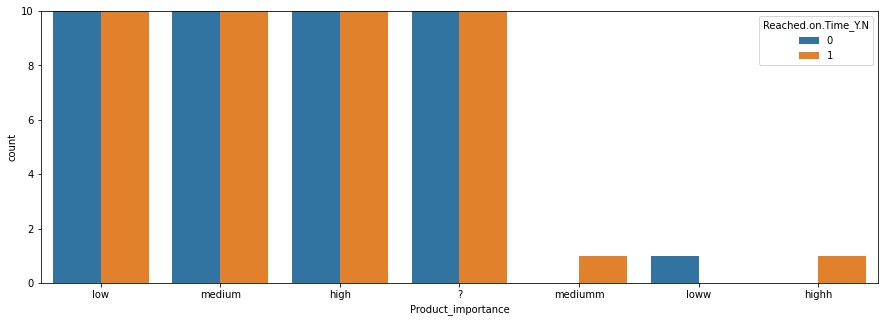

In [118]:
plt.figure(figsize=(15, 5))
plt.ylim(0, 10) # y축의 범위를 0  ~ 10까지로 설정
sns.countplot(data = train,
              x = "Product_importance",
              hue = "Reached.on.Time_Y.N"
             );

In [119]:
train["Product_importance"].unique()

array(['low', 'medium', 'high', '?', 'mediumm', 'loww', 'highh'],
      dtype=object)

In [120]:
test["Product_importance"].unique()

array(['high', 'medium', 'low', '?', 'mediumm'], dtype=object)

In [121]:
product = ['low', 'medium', 'high', '?', 'mediumm', 'loww', 'highh']
product

['low', 'medium', 'high', '?', 'mediumm', 'loww', 'highh']

In [122]:
convert_product = ['low', 'medium', 'high'] + ["Other"] * 4
convert_product

['low', 'medium', 'high', 'Other', 'Other', 'Other', 'Other']

In [123]:
product_dict = dict(zip(product, convert_product))
product_dict

{'low': 'low',
 'medium': 'medium',
 'high': 'high',
 '?': 'Other',
 'mediumm': 'Other',
 'loww': 'Other',
 'highh': 'Other'}

In [124]:
train["Product_importance"] = train["Product_importance"].map(product_dict)

In [125]:
test["Product_importance"] = test["Product_importance"].map(mode_dict)

In [126]:
train.drop("Gender", axis=1, inplace= True)

In [127]:
test.drop("Gender", axis=1, inplace= True)

In [128]:
train.drop("Weight_in_gms", axis=1, inplace = True)

In [129]:
test.drop("Weight_in_gms", axis=1, inplace = True)

In [130]:
# train데이터에서 정답 컬럼
y_train = train["Reached.on.Time_Y.N"]
# train데이터에서 정답 컬럼을 삭제한 후 남은 모든 컬럼들
X_train = train.drop("Reached.on.Time_Y.N", axis = 1)
# 맨 처음에 받았던 test.csv
X_test = test

In [131]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(6999, 8)
(4000, 8)
(6999,)


In [132]:
# 원 핫 인코딩
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [133]:
print(X_test.shape)
print(X_train.shape)

(4000, 15)
(6999, 18)


In [134]:
X_train.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Warehouse_block _A',
       'Warehouse_block _B', 'Warehouse_block _C', 'Warehouse_block _D',
       'Warehouse_block _F', 'Mode_of_Shipment_ Flight',
       'Mode_of_Shipment_ Road', 'Mode_of_Shipment_ Ship',
       'Mode_of_Shipment_Other', 'Product_importance_Other',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium'],
      dtype='object')

In [135]:
X_test.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Warehouse_block _A',
       'Warehouse_block _B', 'Warehouse_block _C', 'Warehouse_block _D',
       'Warehouse_block _F', 'Mode_of_Shipment_ Flight',
       'Mode_of_Shipment_ Road', 'Mode_of_Shipment_ Ship',
       'Mode_of_Shipment_Other', 'Product_importance_Other'],
      dtype='object')

In [136]:
set(X_train.columns) -set(X_test.columns)

{'Product_importance_high',
 'Product_importance_low',
 'Product_importance_medium'}

In [137]:
set(X_test.columns) -set(X_train.columns)

set()

In [138]:
X_train.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Warehouse_block _A',
       'Warehouse_block _B', 'Warehouse_block _C', 'Warehouse_block _D',
       'Warehouse_block _F', 'Mode_of_Shipment_ Flight',
       'Mode_of_Shipment_ Road', 'Mode_of_Shipment_ Ship',
       'Mode_of_Shipment_Other', 'Product_importance_Other',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium'],
      dtype='object')

In [139]:
knn_md = KNeighborsClassifier(n_neighbors=3)

In [140]:
result_knn = cross_val_score(knn_md,
                             X_train,
                             y_train,
                             cv = 5
                            )

In [141]:
result_knn.mean()

0.5746538343714898

In [142]:
scaler = StandardScaler()

In [143]:
result_knn_train = scaler.fit_transform(X_train)

In [144]:
result_knn_train

array([[-1.66924921, -0.47621263, -0.38049457, ..., -0.29861179,
         1.04546755, -0.86159447],
       [ 1.08662637, -0.01103298,  0.05161731, ..., -0.29861179,
         1.04546755, -0.86159447],
       [-0.75062402, -0.94139229,  0.07082228, ..., -0.29861179,
         1.04546755, -0.86159447],
       ...,
       [-0.75062402, -0.94139229,  0.41171054, ..., -0.29861179,
         1.04546755, -0.86159447],
       [-0.75062402, -0.94139229,  0.08522601, ..., -0.29861179,
        -0.95650984,  1.16063883],
       [-0.75062402, -0.01103298,  0.2292633 , ...,  3.3488296 ,
        -0.95650984, -0.86159447]])

In [145]:
result_knn_test = scaler.fit_transform(X_test)
result_knn_test

array([[-0.74271618, -0.78863713,  0.3774816 , ...,  0.75366607,
        -0.24298471, -0.14285714],
       [-0.74271618,  0.37726722, -0.4746283 , ...,  0.75366607,
        -0.24298471, -0.14285714],
       [-0.74271618,  0.765902  , -0.44992946, ..., -1.32684758,
        -0.24298471, -0.14285714],
       ...,
       [-0.74271618, -0.01136757, -0.04239864, ..., -1.32684758,
        -0.24298471, -0.14285714],
       [ 1.94422811,  0.37726722,  0.26016212, ...,  0.75366607,
        -0.24298471, -0.14285714],
       [ 1.04858001, -0.78863713,  0.24163799, ...,  0.75366607,
        -0.24298471,  7.        ]])

In [146]:
result_knn_SS = cross_val_score(knn_md,
                                result_knn_train, # 스케일링된 문제데이터
                                y_train,           # 정답 데이터
                                cv = 5
                               )
result_knn_SS

array([0.57571429, 0.56714286, 0.57071429, 0.55785714, 0.5768406 ])

In [147]:
result_knn_SS.mean()

0.5696538343714899

In [148]:
tree_md = DecisionTreeClassifier(max_depth=3)

In [149]:
result_DT = cross_val_score(tree_md, # 위에서 만든 모델
                            X_train, # 학습용 문제 데이터
                            y_train, # 학습용 정답 데이터
                            cv = 5 # cv = 나눌개수
                           )
result_DT

array([0.61714286, 0.61785714, 0.61428571, 0.59214286, 0.62973553])

In [150]:
result_DT.mean()

0.6142328193607678

In [151]:
forest_md = RandomForestClassifier(n_estimators=100,
                                   random_state=10)
forest_md


RandomForestClassifier(random_state=10)

In [152]:
result_RF = cross_val_score(forest_md, # 위에서 만든 모델
                            X_train, # 학습용 문제 데이터
                            y_train, # 학습용 정답 데이터
                            cv = 5 # cv = 나눌개수
                           )
result_RF    

array([0.59142857, 0.585     , 0.57      , 0.58785714, 0.59185132])

In [153]:
result_RF.mean()

0.5852274073317677

In [154]:
result_submission = pd.read_csv("data/sampleSubmission.csv")
result_submission

,ID,Reached.on.Time_Y.N
0,7000,NaN
1,7001,NaN
2,7002,NaN
3,7003,NaN
4,7004,NaN
...,...,...
3995,10995,NaN
3996,10996,NaN
3997,10997,NaN
3998,10998,NaN


In [155]:
test["Mode_of_Shipment"].unique()

array([' Ship', ' Flight', 'Other', ' Road'], dtype=object)

In [156]:
X_train.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Warehouse_block _A',
       'Warehouse_block _B', 'Warehouse_block _C', 'Warehouse_block _D',
       'Warehouse_block _F', 'Mode_of_Shipment_ Flight',
       'Mode_of_Shipment_ Road', 'Mode_of_Shipment_ Ship',
       'Mode_of_Shipment_Other', 'Product_importance_Other',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium'],
      dtype='object')

In [157]:
X_test.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Warehouse_block _A',
       'Warehouse_block _B', 'Warehouse_block _C', 'Warehouse_block _D',
       'Warehouse_block _F', 'Mode_of_Shipment_ Flight',
       'Mode_of_Shipment_ Road', 'Mode_of_Shipment_ Ship',
       'Mode_of_Shipment_Other', 'Product_importance_Other'],
      dtype='object')

In [158]:
tree_md.fit(X_train, y_train) 
pre = tree_md.predict(X_test)   
pre 

ValueError: Number of features of the model must match the input. Model n_features is 18 and input n_features is 15 

In [ ]:
result_submission["Reached.on.Time_Y.N"] = pre

In [ ]:
result_submission.to_csv("sampleSubmission_tree.csv", index=False)